In [59]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# Dataset Overview

In [99]:
df = pd.read_csv("weatherAUS.csv")
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144727 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           144727 non-null  datetime64[ns]
 1   Location       144727 non-null  category      
 2   MinTemp        143783 non-null  float64       
 3   MaxTemp        143874 non-null  float64       
 4   Rainfall       141948 non-null  float64       
 5   Evaporation    82506 non-null   float64       
 6   Sunshine       75468 non-null   float64       
 7   WindGustDir    135005 non-null  category      
 8   WindGustSpeed  135067 non-null  float64       
 9   WindDir9am     134809 non-null  category      
 10  WindDir3pm     141082 non-null  category      
 11  WindSpeed9am   143583 non-null  float64       
 12  WindSpeed3pm   142246 non-null  float64       
 13  Humidity9am    142678 non-null  float64       
 14  Humidity3pm    140779 non-null  float64       
 15  

<AxesSubplot:>

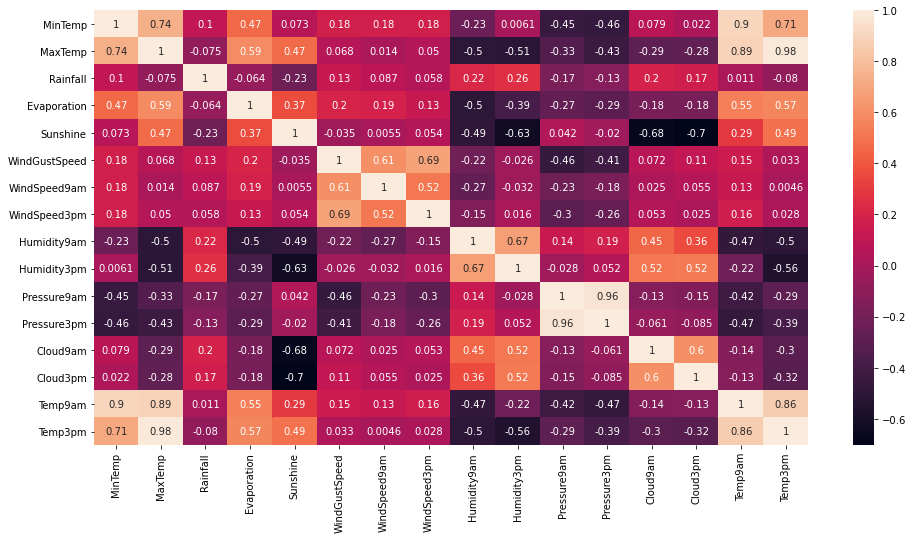

In [95]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)

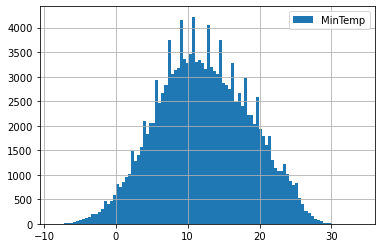

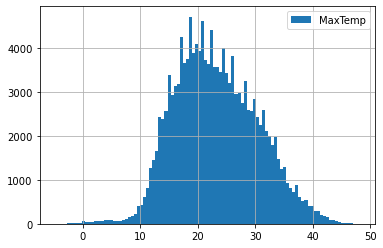

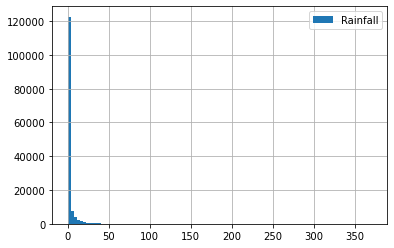

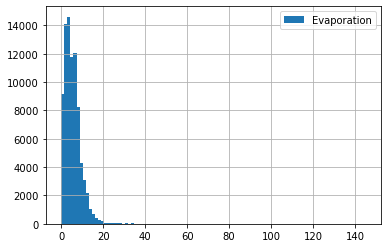

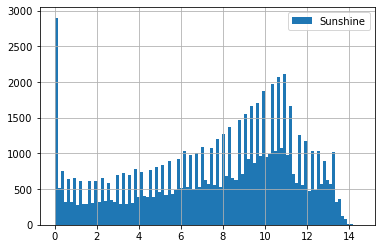

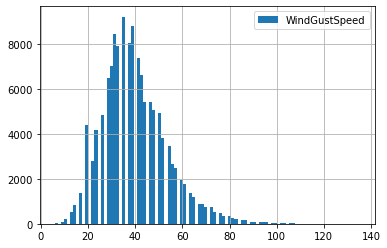

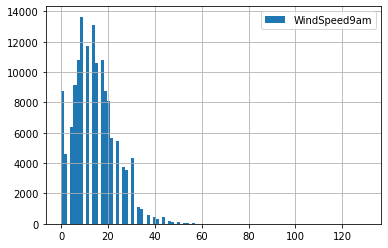

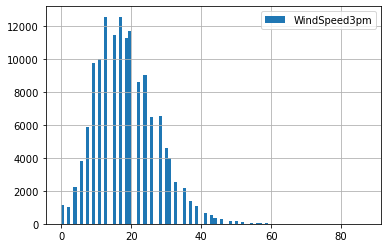

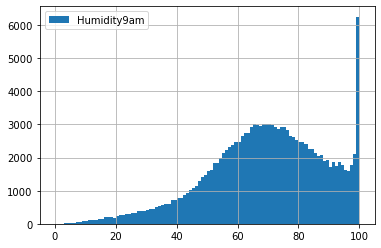

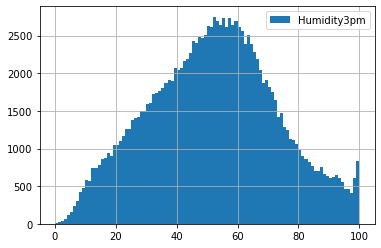

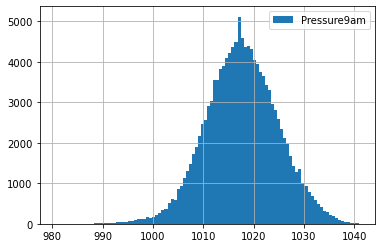

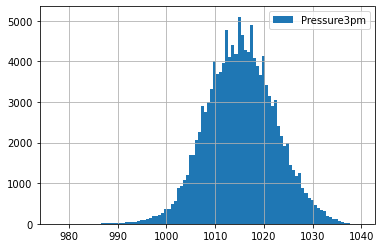

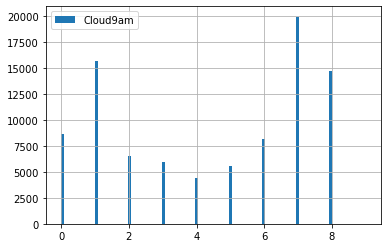

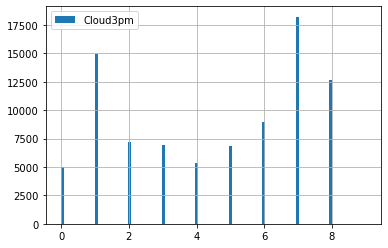

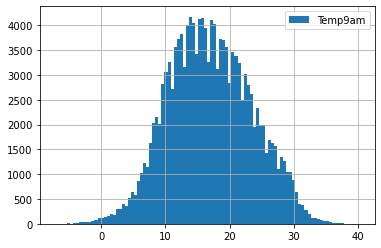

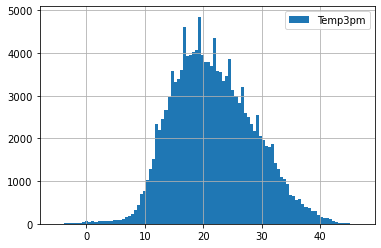

In [96]:
select_float = df.select_dtypes(include="float64").columns
for col in select_float:
    df[col].hist(legend=True, bins=100)
    #sns.boxplot(x=df[col])
    plt.show()

In [97]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# Data Cleaning

In [100]:
#Changing dtype from object to category
select = df.select_dtypes(include="object").columns
df[select] = df[select].astype("category")

#Delete almost empty rows and duplicates
df.drop_duplicates()
df.dropna(thresh=10, inplace=True)

#Handling time data
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
season_map = {
    12: "Winter",
    1: "Winter",
    2: "Winter",
    3: "Spring",
    4: "Spring",
    5: "Spring",
    6: "Summer",
    7: "Summer",
    8: "Summer",
    9: "Autumn",
    10: "Autumn",
    11: "Autumn"
}
df["Season"] = df["Month"].map(season_map)
del[df["Month"]]
#Drop rows with Year 2007 as there are too little observations
df = df.loc[df["Year"] != 2007]

#Dealing with outliers

#Replace values
df.RainToday = df.RainToday.replace(["No", "Yes"], [0, 1])
df.RainTomorrow = df.RainTomorrow.replace(["No", "Yes"], [0, 1])

In [101]:
df.RainToday.value_counts()

0.0    110113
1.0     31835
Name: RainToday, dtype: int64

In [76]:
#Dealing with empty rows

seasons = test["Season"].unique()
for season in seasons: 
    pass

df.loc[df["Season"] == "Winter"]

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0      2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1      2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2      2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3      2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4      2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...           ...      ...      ...      ...       ...          ...       ...   
145338 2017-02-24    Uluru     19.3     36.7       0.0          NaN       NaN   
145339 2017-02-25    Uluru     18.1     35.9       0.0          NaN       NaN   
145340 2017-02-26    Uluru     19.3     37.5       0.0          NaN       NaN   
145341 2017-02-27    Uluru     17.5     38.0       0.0          NaN       NaN   
145342 2017-02-28    Uluru     15.9     38.2       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am  ... Pressure9am  Pressure3pm  \
0                W           44.0          W  ...      1007.7       1007.1   
1              WNW           44.0        NNW  ...      1010.6       1007.8   
2              WSW           46.0          W  ...      1007.6       1008.7   
3               NE           24.0         SE  ...      1017.6       1012.8   
4                W           41.0        ENE  ...      1010.8       1006.0   
...            ...            ...        ...  ...         ...          ...   
145338          SE           50.0          E  ...      1019.4       1014.6   
145339           E           43.0        ESE  ...      1017.2       1012.9   
145340         ESE           37.0          E  ...      1013.7       1009.4   
145341         SSE           37.0          E  ...      1013.5       1009.6   
145342         SSE           37.0          E  ...      1012.5       1008.8   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  \
0            8.0       NaN     16.9     21.8         No            No  2008   
1            NaN       NaN     17.2     24.3         No            No  2008   
2            NaN       2.0     21.0     23.2         No            No  2008   
3            NaN       NaN     18.1     26.5         No            No  2008   
4            7.0       8.0     17.8     29.7         No            No  2008   
...          ...       ...      ...      ...        ...           ...   ...   
145338       NaN       NaN     26.3     35.0         No            No  2017   
145339       NaN       NaN     25.8     34.3         No            No  2017   
145340       NaN       NaN     27.1     36.3         No            No  2017   
145341       NaN       NaN     26.8     36.8         No            No  2017   
145342       NaN       NaN     28.3     37.8         No            No  2017   

        Season  
0       Winter  
1       Winter  
2       Winter  
3       Winter  
4       Winter  
...        ...  
145338  Winter  
145339  Winter  
145340  Winter  
145341  Winter  
145342  Winter  

[34875 rows x 25 columns]

In [88]:
test = df.copy()

In [71]:
for 
test[test["Season"]=="Winter"]

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0      2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1      2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2      2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3      2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4      2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...           ...      ...      ...      ...       ...          ...       ...   
145338 2017-02-24    Uluru     19.3     36.7       0.0          NaN       NaN   
145339 2017-02-25    Uluru     18.1     35.9       0.0          NaN       NaN   
145340 2017-02-26    Uluru     19.3     37.5       0.0          NaN       NaN   
145341 2017-02-27    Uluru     17.5     38.0       0.0          NaN       NaN   
145342 2017-02-28    Uluru     15.9     38.2       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am  ... Pressure9am  Pressure3pm  \
0                W           44.0          W  ...      1007.7       1007.1   
1              WNW           44.0        NNW  ...      1010.6       1007.8   
2              WSW           46.0          W  ...      1007.6       1008.7   
3               NE           24.0         SE  ...      1017.6       1012.8   
4                W           41.0        ENE  ...      1010.8       1006.0   
...            ...            ...        ...  ...         ...          ...   
145338          SE           50.0          E  ...      1019.4       1014.6   
145339           E           43.0        ESE  ...      1017.2       1012.9   
145340         ESE           37.0          E  ...      1013.7       1009.4   
145341         SSE           37.0          E  ...      1013.5       1009.6   
145342         SSE           37.0          E  ...      1012.5       1008.8   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  \
0            8.0       NaN     16.9     21.8         No            No  2008   
1            NaN       NaN     17.2     24.3         No            No  2008   
2            NaN       2.0     21.0     23.2         No            No  2008   
3            NaN       NaN     18.1     26.5         No            No  2008   
4            7.0       8.0     17.8     29.7         No            No  2008   
...          ...       ...      ...      ...        ...           ...   ...   
145338       NaN       NaN     26.3     35.0         No            No  2017   
145339       NaN       NaN     25.8     34.3         No            No  2017   
145340       NaN       NaN     27.1     36.3         No            No  2017   
145341       NaN       NaN     26.8     36.8         No            No  2017   
145342       NaN       NaN     28.3     37.8         No            No  2017   

        Season  
0       Winter  
1       Winter  
2       Winter  
3       Winter  
4       Winter  
...        ...  
145338  Winter  
145339  Winter  
145340  Winter  
145341  Winter  
145342  Winter  

[34875 rows x 25 columns]

In [ ]:
#Remove highly correlated columns


In [90]:
#Dealing with outliers
select = ["WindSpeed9am", "WindSpeed3pm", "WindGustSpeed", "Temp9am", "Temp3pm"]
print("Before: ", df.shape)
for col in select:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    mask = df[col].loc[(df[col] < (q1 - 1.5*IQR)) | (df[col] > (q3+1.5*IQR))]
    df.drop(labels=mask.index, inplace=True)

print("After: ", df.shape)
print(df.RainTomorrow.value_counts())

Before:  (141734, 23)
After:  (137524, 23)
No     106089
Yes     28394
Name: RainTomorrow, dtype: int64


In [216]:
q1 = df.Evaporation.quantile(0.25)
q3 = df.Evaporation.quantile(0.75)
IQR = q3-q1

df.Evaporation.loc[(df.Evaporation < (q1 - 1.5*IQR)) | (df.Evaporation > (q3+1.5*IQR))]

6050      14.8
6062      14.8
6063      16.4
6064      17.4
6065      16.0
          ... 
143775    16.8
143778    31.0
143781    16.0
143784    17.0
143806    19.0
Name: Evaporation, Length: 1995, dtype: float64

In [305]:
select_float = df.select_dtypes(include="float64").columns
print("Before: ", df.shape)
for col in select_float:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    mask = df[col].loc[(df[col] < (q1 - 1.5*IQR)) | (df[col] > (q3+1.5*IQR))]
    df.drop(labels=mask.index, inplace=True)
    #df[col].hist(legend=True, bins=100)
    #plt.show()

print("After: ", df.shape)
print(df.RainTomorrow.value_counts())

Before:  (143390, 27)
After:  (110237, 27)
No     91047
Yes    17339
Name: RainTomorrow, dtype: int64


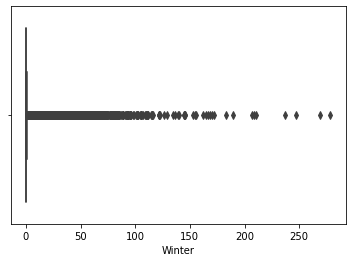

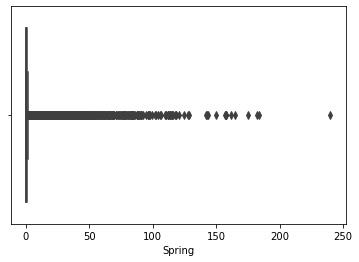

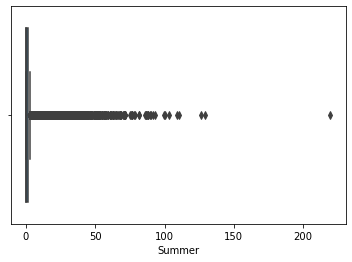

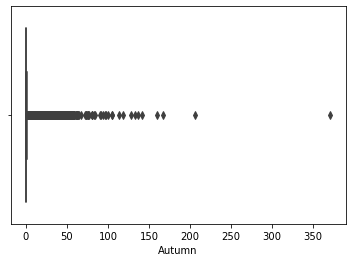

In [18]:
group = df.groupby(by=["Season"])["Rainfall"].apply(pd.DataFrame)
seasons = ["Winter", "Spring", "Summer", "Autumn"]
for season in seasons: 
    sns.boxplot(x=group[season])
    plt.show()

<AxesSubplot:>

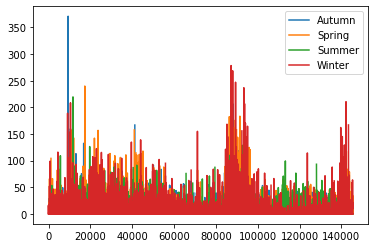

In [19]:
group = df.groupby(by=["Season"])["Rainfall"].apply(pd.DataFrame)
group.plot()